<a href="https://colab.research.google.com/github/Leguty/bibliotecaG23/blob/main/10_Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SERIES DE TIEMPO

#¿Qué es una serie de tiempo?

# Una serie de tiempo o serie temporal es una secuencia de datos, observaciones o valores, medidos en determinados momentos y ordenados cronológicamente. 
# Los datos pueden estar espaciados a intervalos iguales o desiguales. Una vez que se captura una serie de tiempo, a menudo se realiza un análisis sobre ella para identificar patrones en los datos, en esencia, lo que se busca es entender que suceda a medida que el tiempo va avanzando. 
# Ser capaz de procesar datos de series de tiempo es una habilidad esencial en el mundo moderno. 
# Uno de los usos más habituales de las series de tiempo es su análisis para predicción y pronóstico

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm

### Time Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
#from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.sarimax_model import SARIMAX



In [ ]:
#Debemos comenzar obteniendo datos que nos permitan ver un poco de series de tiempo:

In [2]:
#url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv', index_col=0)
df.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [ ]:
#Ahora, debemos asegurar que las fechas estés en un formato que podamos usar, en este caso con pandas:

In [3]:
df.index = pd.to_datetime(df.index)

In [ ]:
# Podemos ver la distribución de algunos de los datos:

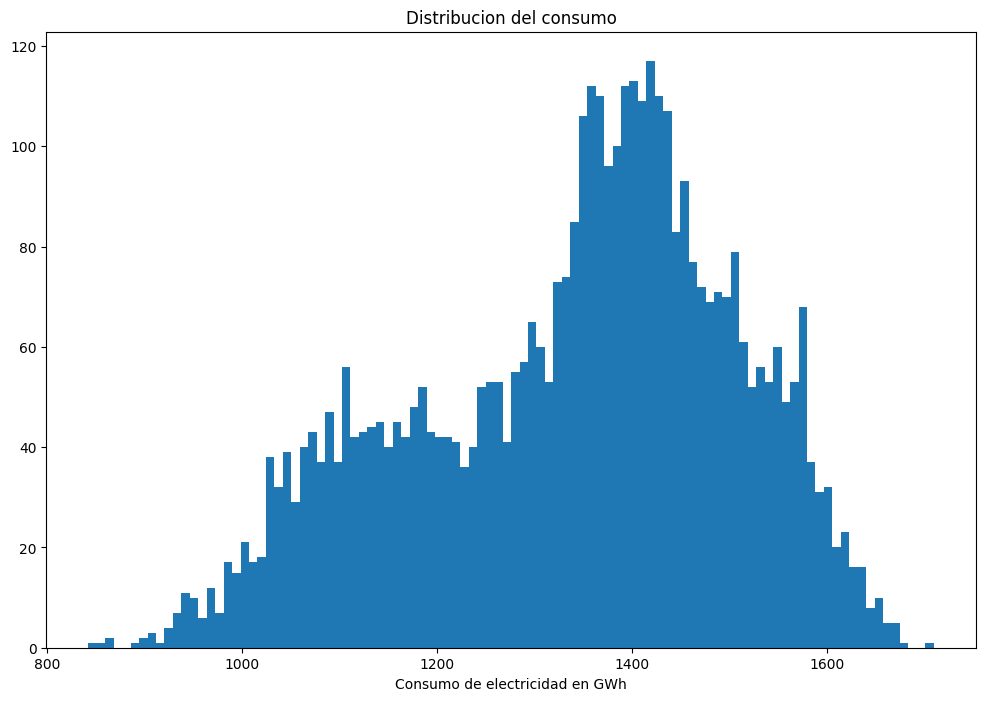

In [4]:
# Distribución del consumo
plt.figure(figsize=(12,8))
plt.hist(df['Consumption'], bins=100)
plt.title("Distribucion del consumo")
plt.xlabel("Consumo de electricidad en GWh")
plt.show()

In [ ]:
#Serie de tiempo:

#Comparemos la producción total, con el consumo total:

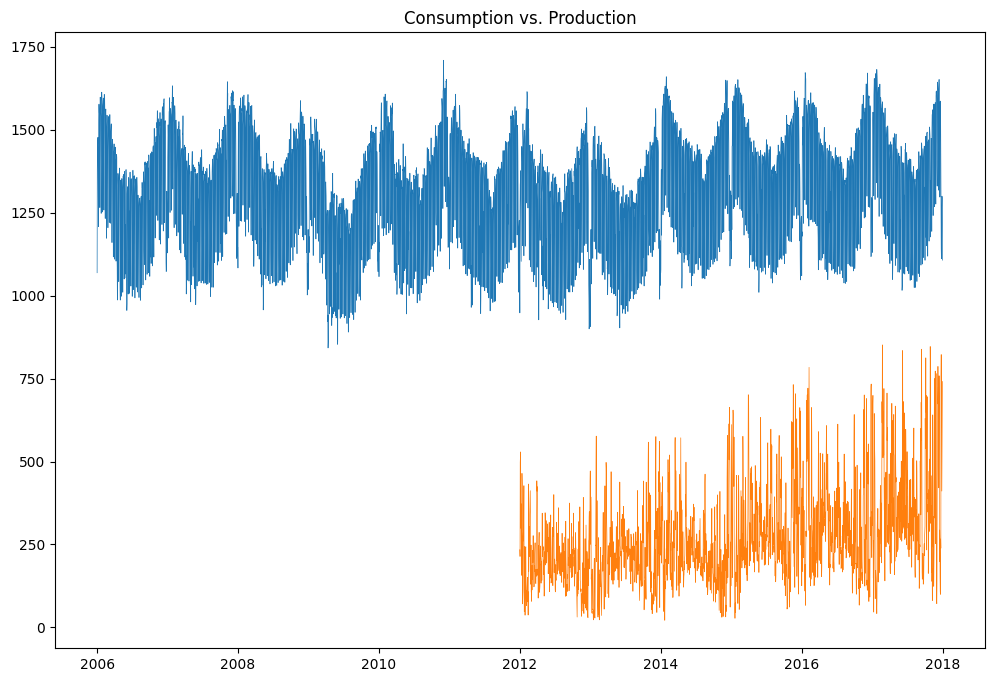

In [5]:
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], linewidth = 0.5)
plt.plot(df['Wind+Solar'], linewidth = 0.5)
plt.title("Consumption vs. Production")
plt.show()

In [ ]:
#PODEMOS OBSERVAR ALGUNAS TENDENCIAS:

### La producción solar es mucho menor durante el invierno. La producción eólica es, sin embargo, mayor en época invernal, al igual que el consumo. Existe una tendencia creciente en la producción de energía solar y eólica a lo largo del tiempo. Existe un gran número de puntos de consumo situados en la parte más alta de la serie temporal, y algunos puntos situados por debajo de esta curva.

In [ ]:
#Esto es solo una muestra de lo que se puede observar a simple vista con una serie de tiempo, sin embargo, los datos, por ejemplo, se pueden tratar de analizar con una regresión lineal y luego intentar realizar una predicción.


In [6]:
# Por el momento, trate de vi